## `Requesting` fixtures

At a basic level, test functions request fixtures they require by declaring them as arguments.

When `pytest` goes to run a test, it looks at the parameters in that test function’s signature, and then searches for `fixtures` that have the same names as those parameters. Once pytest finds them, it runs those fixtures, captures what they returned (if anything), and passes those objects into the test function as arguments.


## `@pytest.fixture`


Assume we add another class `Rectangle` into the `shapes.py`


In [3]:
# code in shapes.py
import math

class Shape:
    def area(self):
        pass
    def perimeter(self):
        pass
    
class Circle(Shape):
    def __init__(self, radius) -> None:
        self.radius = radius
    
    def area(self):
        return math.pi * (self.radius**2)
    
    def perimeter(self):
        return 2 * math.pi * self.radius
    
class Rectangle(Shape):
    def __init__(self,length,width) -> None:
        self.length = length
        self.width = width
        
    def area(self):
        return self.length * self.width
    
    def perimeter(self):
        return 2 * (self.length + self.width)
    
    def __eq__(self, other: object) -> bool:
        if not isinstance(other,Rectangle):
            return False
        
        return self.width == other.width and self.length == self.length

We can write a class-based test file, for example:

```
import pytest
import shapes
import math

class TestRectangle:
    def setup_rec(self):
        self.rec = shapes.Rectangle(10,20)

    def test_area(self):
        assert self.rec.area == self.rec.length * self.rec.width

    def test_perimeter(self):
        assert self.rec.perimeter == 2 * (self.rec.length + self.rec.width)
```

In here, we use `setup` function to create a instance, but it only work in class-based test, what if we want to write function-based test?

We use `@pytest.fixture`

```
@pytest.fixture
def my_rec():
    return shapes.Rectangle(10,20)

@pytest.fixture
def weird_rectangle():
    return shapes.Rectangle(5,6)

def test_area(my_rec):
    assert my_rec.area() == my_rec.length * my_rec.width

def test_perimeter(my_rec):
    assert my_rec.perimeter() == 2 * (my_rec.length + my_rec.width)

def test_not_equal(my_rec,weird_rectangle):
    assert my_rec!= weird_rectangle

```

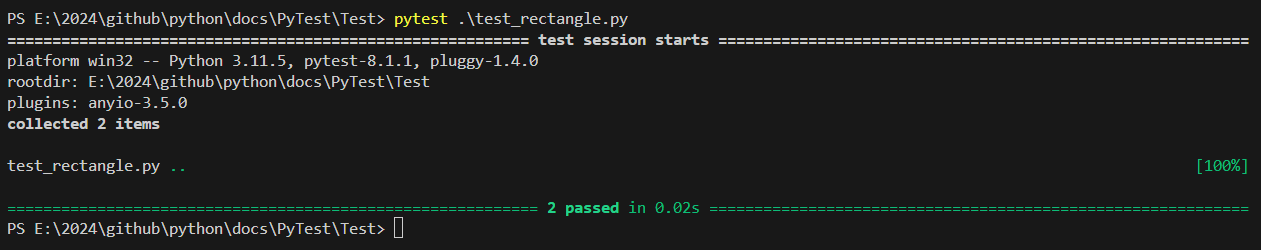


## `conftest.py`

- If we write multiple test files, and do not want to create these test instances over and over again, we can put them into a file named `conftest.py`
  - `pytest` will automatically detect it and load script inside to every test file
- The code of `conftest.py` from above example

```
import pytest
import shapes

@pytest.fixture
def my_rec():
    return shapes.Rectangle(10,20)

@pytest.fixture
def weird_rectangle():
    return shapes.Rectangle(5,6)
```


## Application

Fixtures are needed when you have **some setup operations that need to be done several times before tests**. Instead of writing the same code over and over for each test, you can use `fixtures` to provide **a fixed baseline** so that tests execute in a predictable environment.

This is particularly useful in the following scenarios:

1. **Data Preparation**: When tests require **a specific set of data to work with**, fixtures can be used to create and tear down this data before and after the tests run.
2. **Environment Configuration**: If your tests need the **application or environment to be in a certain state**, fixtures can ensure this state is achieved before tests start.
3. **Resource Allocation and Cleanup**: For tests that involve external resources like `database connections`, `network sockets`, or `temporary files`, `fixtures` can handle the allocation and release of these resources safely and efficiently.
4. **Dependency Injection**: Fixtures can also be used to inject dependencies into your test functions, making it easier to manage test dependencies.


### Example

In this example, `sample_data` is a `fixture` function that returns a dictionary.

- This `fixture` is then `injected` into the `test_version` function as an argument.
- `Pytest` ensures that the `sample_data` `fixture` is called before the test function, and **the returned value is passed to the test**.


In [4]:
import pytest

@pytest.fixture
def sample_data():
    # Setup: Code to prepare test data
    data = {'Python': '3.8', 'pytest': '6.2'}
    return data

def test_version(sample_data):
    # This test will use the sample data provided by the fixture
    assert sample_data['Python'] == '3.8'